## Due date: Friday, 2 April 2021, 11:59 PM

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
%config IPCompleter.greedy=True
%config Completer.use_jedi = False

In [2]:
def saveto(filename):
    plt.savefig('LaTeX Report/figures/'+ filename)

def saveimg(filename, image):
    cv.imwrite('LaTeX Report/figures/'+ filename,image)

def sigmoid(hypothesis):
    return 1/(1+ np.exp(-hypothesis))
         

In [3]:
# Loading the Data Set
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train: ', x_train.shape); print('y_train: ', y_train.shape)
#print(y_train[0:10])

print("Pre-processing loaded data...\n")
# y_train contains labels form 0 to 9 corresponding to 10 classes.
K = len(np.unique(y_train)) # Number of Classes

Ntr = x_train.shape[0]; print('Number of training samples:', Ntr) # Number of training samples 50,000
Nte = x_test.shape[0]; print('Number of test samples: ',Nte,'\n')      # Number of test samples 10,000
Din = 3072 # CIFAR10 # 32x32x3 = height x width x channel

# Normalize pixel values: Image data preprocessing
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0) # axis=0: mean of a column; Mean of each pixel
x_train = x_train - mean_image
x_test = x_test - mean_image

# Convert class vectors to binary class matrices.
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K); print('y_train: ', y_train.shape); #print(y_train[0:10,:])
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K); #print(y_test[0:10,:])

x_train = np.reshape(x_train,(Ntr,Din)).astype('float32');# print(x_train[0:10, 0:20])
x_test = np.reshape(x_test,(Nte,Din)).astype('float32')
print('Reshaped x_train: ', x_train.shape)
print('Reshaped x_test: ', x_test.shape)
print("Pre-processing completed.")

x_train:  (50000, 32, 32, 3)
y_train:  (50000, 1)
Pre-processing loaded data...

Number of training samples: 50000
Number of test samples:  10000 

y_train:  (50000, 10)
Reshaped x_train:  (50000, 3072)
Reshaped x_test:  (10000, 3072)
Pre-processing completed.


# Part 1

[Reference1](https://cs231n.github.io/linear-classify/)

A part of the code for a linear classifier for CIFAR10 given in listing 1. For our linear classifier, the score function is f (x) = Wx + b, and the loss function is the mean sum of squared errors function. [3 marks]
1. Implement gradient descent and run for 300 epochs.
2. Show the weights matrix W as 10 images.
3. Report the (initial) learning rate, training and testing loss and accuracies.

(Hint: If your loss explodes, reduce the leaning rate.)
* [np.unique](https://numpy.org/doc/stable/reference/generated/numpy.unique.html), [np.mean](https://numpy.org/doc/stable/reference/generated/numpy.mean.html), [tf.keras.utils.to_categorical](https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical), [np.random.randn](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html)

In [4]:
print("Initializing the weight matrix with random weights...")
std=1e-5 # For random samples from N(\mu, \sigma^2), use: sigma * np.random.randn(...) + mu
w1 = std*np.random.randn(Din, K) # Initializing the weight matrix with random weights
b1 = np.zeros(K) # Initializing the bias vector
print("w1:", w1.shape);print("b1:", b1.shape)

# Keep track of two sets of parameters w1 and b1 seperately is not really efficient.
# This can be eiliminated by combining both of them into one single matrix as follows.
# Aditionally the bias term '1' must be added infront of each image row, for this to wrok.
# i.e to enable matrix multiplication.

print("Rearranging train and test samples...")

# Rearranging train and test samples: (ra=rearranged)
x_train_ra = np.concatenate((np.ones((x_train.shape[0],1)),x_train), axis=1); print('Rearranged x_train: ', x_train_ra.shape)
x_test_ra  = np.concatenate((np.ones((x_test.shape[0],1)),x_test), axis=1)

# Rearranging weight matrix and bias matrix into single matrix
w1 = np.concatenate((b1.reshape(1,K), w1), axis=0); print('Rearranged w1: ',w1.shape)

print("Rearranging completed.")

iterations = 800  # Gradient descent interations
lr = 1.4e-3 # Learninig rate
lr_decay= 0.999
reg = 5e-6
loss_history = [] # Vlaues of cost function at each iteration 
train_acc_history = []
val_acc_history = []

m = x_train.shape[0]  # Number of training examples

# Running gradient descent number of times speciied in iterations
print("Running gradient descent...")
for t in range(iterations):
    # Forward Propagation
    hypothesis = x_train_ra.dot(w1)
    #hypothesis = hypothesis/np.max(hypothesis)
    loss = (1/(2*m))*np.sum(( hypothesis - y_train)**2) + (1/(2*m))*reg*np.sum(w1**2) 
    loss_history.append(loss)
    if t%15==0: print("Iteration {}, loss = {}".format(t+1,loss))
    
    # Backward Propagation
    dw1 = (1/m)*(x_train_ra.T.dot(hypothesis - y_train))  + (1/m)*reg*w1 
    w1 = w1 - lr*dw1
    lr = lr*lr_decay
print("Gradient Descent completed. Parameters were trained")   

Initializing the weight matrix with random weights...
w1: (3072, 10)
b1: (10,)
Rearranging train and test samples...
Rearranged x_train:  (50000, 3073)
Rearranged w1:  (3073, 10)
Rearranging completed.
Running gradient descent...
Iteration 1, loss = 0.5000050589447794
Iteration 16, loss = 0.48235106131742056
Iteration 31, loss = 0.4739694345123456
Iteration 46, loss = 0.4681962063202092
Iteration 61, loss = 0.46368522345021745
Iteration 76, loss = 0.45994188183292695
Iteration 91, loss = 0.45672068737863486
Iteration 106, loss = 0.4538819364667006
Iteration 121, loss = 0.4513386964541149
Iteration 136, loss = 0.44903292256376576
Iteration 151, loss = 0.44692361025516203
Iteration 166, loss = 0.4449804777267284
Iteration 181, loss = 0.44318036921738413
Iteration 196, loss = 0.4415050814307593
Iteration 211, loss = 0.43993997956752223
Iteration 226, loss = 0.4384730764127614
Iteration 241, loss = 0.4370943968275952
Iteration 256, loss = 0.43579552588875337
Iteration 271, loss = 0.4345692

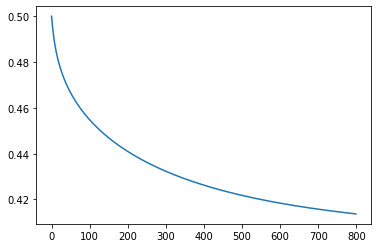

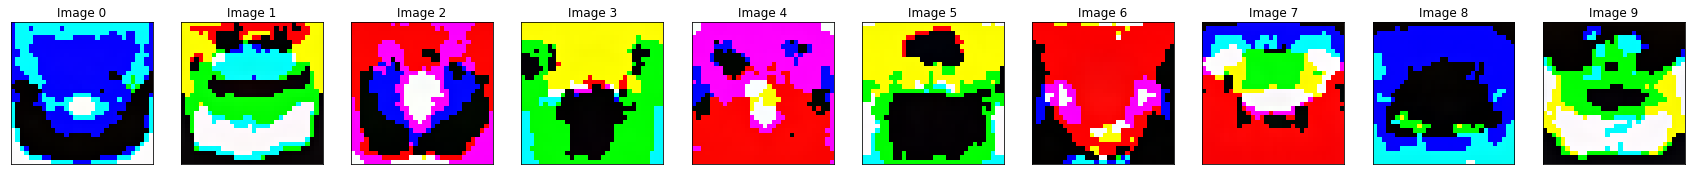

In [5]:
plt.plot(loss_history)

# Showing the weights matrix W as 10 images.
w1 = ((w1/np.max(w1))*255).astype('uint8')
fig, axes  = plt.subplots(1,10, sharex='all', sharey='all', figsize=(30,30))
location = 1
for i in range(K):
    image = w1[1:,i].reshape(32,32,3)
    plt.subplot(1,10,location),plt.imshow(image[:,:,::-1])
    plt.title("Image "+ str(i)),plt.xticks([]),plt.yticks([])    
    saveimg("Reg Image "+ str(i)+".jpg", image)
    location+=1
plt.show()

In [6]:
# batch_size = 500 # --> Using all the training examples
# seed = 0
# rng = np.random.default_rng(seed=seed)
# for t in range(iterations):
#     indices = np.arange(batch_size)
#     rng.shuffle(indices)
#     x_train = x_train[indices]
#     y_train = y_train[indices]
#     x_test  =  x_test[indices]
#     y_test  =  y_test[indices]
    
# print(rng)
# indices = np.arange(Ntr)
# rng.shuffle(indices)
# set = indices[0:5]
# print('set :', set)
# print(x_train[set])

# Part 2
Code a two-layer fully connected network with H = 200 hidden nodes. Choose the sigmoid function as the activation function for the hidden nodes. The output layer has no activation function. [3 marks]

1. Implement gradient descent and run for 300 epochs.
2. Report the (initial) learning rate, training and testing loss and accuracies.

In [ ]:
H = 200 # No of hidden nodes
print("Initializing the weight matrix with random weights...")
std=1e-5 # For random samples from N(\mu, \sigma^2), use: sigma * np.random.randn(...) + mu

# Hidden Layer 
w1 = std*np.random.randn(Din, H) # Initializing the weight matrix with random weights
b1 = np.zeros(H) # Initializing the bias vector
print("w1:", w1.shape);print("b1:", b1.shape)

# Last Layer
w2 = std*np.random.randn(H, K) # Initializing the weight matrix with random weights
b2 = np.zeros(K) # Initializing the bias vector
print("w2:", w2.shape);print("b2:", b2.shape)

print("Rearranging train and test samples...")
6
# Rearranging train and test samples: (ra=rearranged)
x_train_ra = np.concatenate((np.ones((x_train.shape[0],1)),x_train), axis=1); print('Rearranged x_train: ', x_train_ra.shape)
x_test_ra  = np.concatenate((np.ones((x_test.shape[0],1)),x_test), axis=1)

# Rearranging weight matrices and bias matrices into single matrix
w1 = np.concatenate((b1.reshape(1,H), w1), axis=0); print('Rearranged w1: ',w1.shape)
w2 = np.concatenate((b2.reshape(1,K), w2), axis=0); print('Rearranged w2: ',w2.shape)

print("Rearranging completed.")

iterations = 300  # Gradient descent interations
lr = 1.4e-2 # Learninig rate
lr_decay= 0.999
reg = 5e-2
loss_history = [] # Vlaues of cost function at each iteration 
train_acc_history = []
val_acc_history = []

m = x_train.shape[0]  # Number of training examples

# Running gradient descent number of times speciied in iterations
print("Running gradient descent...")
for t in range(iterations):
    # Forward Propagation
    hypothesis = sigmoid(x_train_ra.dot(w1)) # Layer 1 
    predict = hypothesis.dot(w2) # Layer 2    
    loss = (1/(2*m))*np.sum(( predict - y_train)**2) + (1/(2*m))*reg*np.sum(w1**2) + (1/(2*m))*reg*np.sum(w2**2)
    loss_history.append(loss)
    if t%15==0: print("Iteration {}, loss = {}".format(t,loss))
    
    # Back Propagation
    dpredict =  (1/m)*(predict - y_train)
    dw1 = (hypothesis.T.dot(dpredict)  + (1/m)*reg*w2 
    
    w1 = w1 - lr*dw1
    
print("Gradient Descent completed. Parameters were trained") 


# Part 3

Modify the code in item 2 to carry out stochastic gradient descent with a batch size of 500. [2 marks]
1. Report training and testing loss and accuracies.
2. Compare results with item2 (justify).

# Part 4 
Construct a CNN using Keras.models.Sequential (with the following configuration: C32, C64, C64, F64, F10. All three convolutions layers are 3x3. Max pooling (2x2) follows each convolution layer. Use SDG (with momentum) with a batch size of 50 and CategoricalCrossentropy as the loss. [2
marks]
1. How many learnable parameters are there in this network?
2. Report the parameters such as the learning rate and momentum.
3. Report training and testing loss and accuracies.